In [255]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso

In [256]:
# generating data
np.random.seed(42)
x = np.random.normal(0, 1, 100)
eps = np.random.normal(0, 0.25, 100)

In [257]:
y = -0.5 + 0.75 * x + eps

value of beta0 is -0.5 
value of beta1 is 0.75

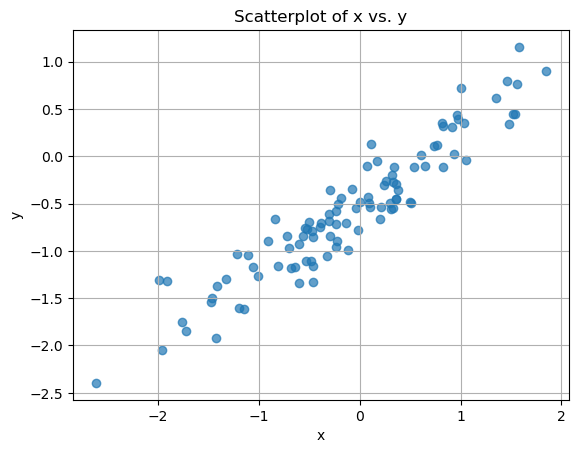

In [258]:
# scatterplot displaying the relationship between x and y
plt.scatter(x, y, alpha=0.7)  
plt.title("Scatterplot of x vs. y")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

plt.show()

In [259]:
# making and fitting the linear regression model
model = LinearRegression()
model.fit(x.reshape(-1,1), y)

LinearRegression()

In [260]:
# getting B^0 and B^1
slope = model.coef_[0]
intercept = model.intercept_

print("slope", slope)
print('intercept', intercept)


slope 0.7141857099321391
intercept -0.4981430425340084


In [262]:
# predict y using x 
y_pred = model.predict(x.reshape(-1,1))

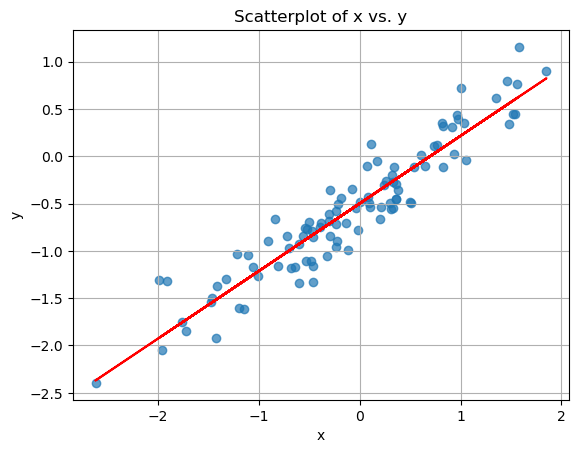

In [263]:
# the least squares line on the scatterplot
plt.plot(x, y_pred, color='red', label='Regression Line')
plt.scatter(x, y, alpha=0.7)  
plt.title("Scatterplot of x vs. y")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

plt.show()

In [264]:
# computing R^2 statics 
r_squared = r2_score(y, y_pred)
print("R score", r_squared)

R score 0.8829199943498208


In [265]:
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x.reshape(-1,1))

# fit a linear regression model using the polynomial features
poly_model = LinearRegression()
poly_model.fit(x_poly, y)

# predict y values using the model
y_pred_2 = poly_model.predict(x_poly)

In [266]:
# getting B^1, B^2
coefficients = poly_model.coef_
print("coefficients", coefficients)

coefficients [0.         0.73106418 0.04610749]


In [268]:
# getting B^0
poly_model.intercept_

-0.5345352870115676

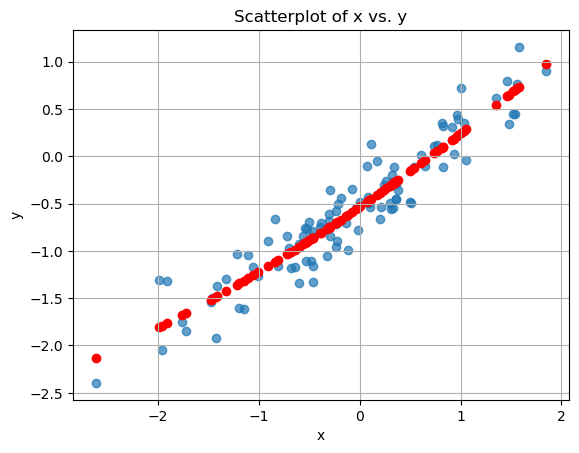

In [269]:
#  least squares line on the scatterplot
# plt.plot(x, y_pred, color='red', label='Regression Line')
plt.scatter(x, y, alpha=0.7)  
plt.scatter(x, y_pred_2, color='red', label='Second Regression Line')
plt.title("Scatterplot of x vs. y")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

plt.show()

In [270]:
# computing R^2 statics 
r_squared_2 = r2_score(y, y_pred_2)
print("R score", r_squared_2)

R score 0.8883702598775292


In [271]:
# generating the second data
y2 = -0.5 + 0.75 * x + np.power(x,2) + eps

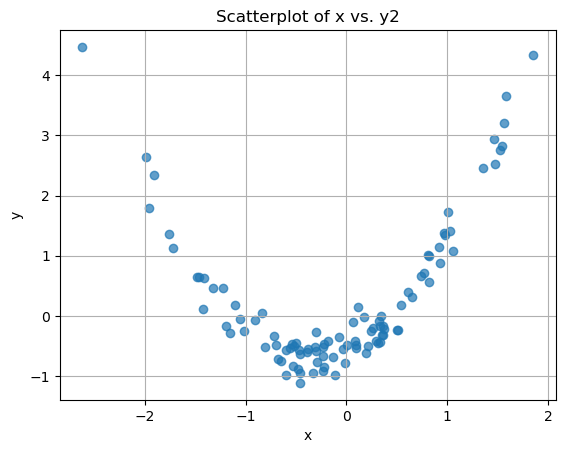

In [272]:
# plotting the second data
plt.scatter(x, y2, alpha=0.7)  
plt.title("Scatterplot of x vs. y2")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

plt.show()

In [279]:
# making and fitting the linear model
model_2 = LinearRegression()
model_2.fit(x.reshape(-1,1), y2)

LinearRegression()

In [285]:
# getting B^0 and B^1 from the linear model
slope_2 = model_2.coef_[0]
intercept_2 = model_2.intercept_
print("slope", slope_2)
print('intercept', intercept_2)

slope 0.3481179278875428
intercept 0.2911483870392203


In [286]:
# predicting using the linear model
y_pred_21 = model_2.predict(x.reshape(-1,1))

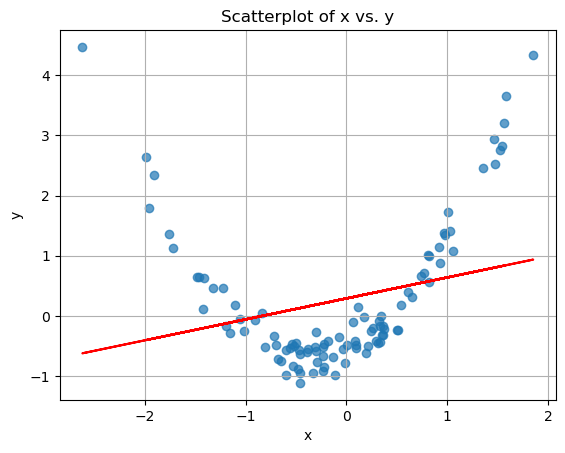

In [287]:
#  least squares line on the scatterplot
plt.plot(x, y_pred_21, color='red', label='Regression Line')
plt.scatter(x, y2, alpha=0.7)  
plt.title("Scatterplot of x vs. y")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

plt.show()

In [288]:
# R2 statistics.
r_squared_21 = r2_score(y2, y_pred_21)
print("R score", r_squared_21)

R score 0.06708446395233303


In [289]:
poly2 = PolynomialFeatures(degree=2)
x_poly2 = poly2.fit_transform(x.reshape(-1,1))

# fit a linear regression model using the polynomial features
poly_model2 = LinearRegression()
poly_model2.fit(x_poly2, y2)

# predict y values using the model
y_pred_22 = poly_model2.predict(x_poly2)

In [290]:
# getting B^1, B^2
coefficients = poly_model2.coef_
print("coefficients", coefficients)

coefficients [0.         0.73106418 1.04610749]


In [293]:
# getting B^0
poly_model2.intercept_

-0.5345352870115672

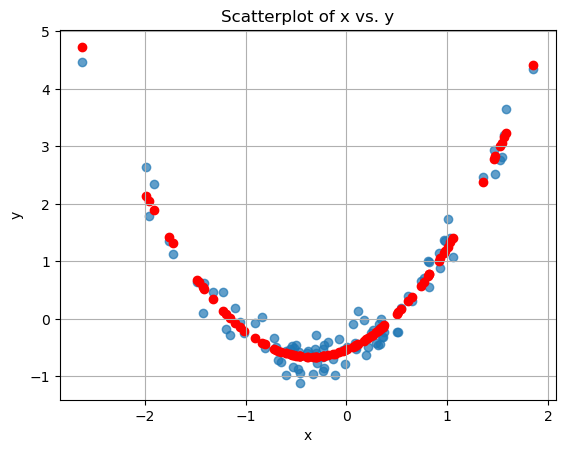

In [291]:
#  least squares line on the scatterplot
plt.scatter(x, y2, alpha=0.7)  
plt.scatter(x, y_pred_22, color='red', label='Second Regression Line')
plt.title("Scatterplot of x vs. y")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

plt.show()

In [292]:
# R2 statistics
r_squared_22 = r2_score(y2, y_pred_22)
print("R score", r_squared_22)

R score 0.9643014933895998


# Lasso:
In this section im doing the same thing as before but using Lasso instead of normal linear regression. The different here is that Lasso use L1 regularization and the strenght of regularization is controled by value alpha. So basically if we set the value of alpha = 0 its the same model as a normal linear regression. I did the testing with different value of alpha but the smaller the alpha the better the result. For this PDF im leaving it =1 so the really bad result are shown. 
There are many reasons why regularization is not useful for this case. Here we only have 1 feature and not many data samples. Regularization is usually useful for cases that the number of features are more than samples which is not true in this example. 

In [237]:
# the result get better with smaller alpha
alpha = 1
model_lasso = Lasso(alpha=alpha) 
model_lasso.fit(x.reshape(-1,1), y)

Lasso(alpha=1)

In [284]:
slope_lasso = model_lasso.coef_[0]
intercept_lasso = model_lasso.intercept_

print("slope", slope_lasso)
print('intercept', intercept_lasso)

slope 0.0
intercept -0.5723087412830895


In [239]:
y_pred_lasso = model_lasso.predict(x.reshape(-1,1))

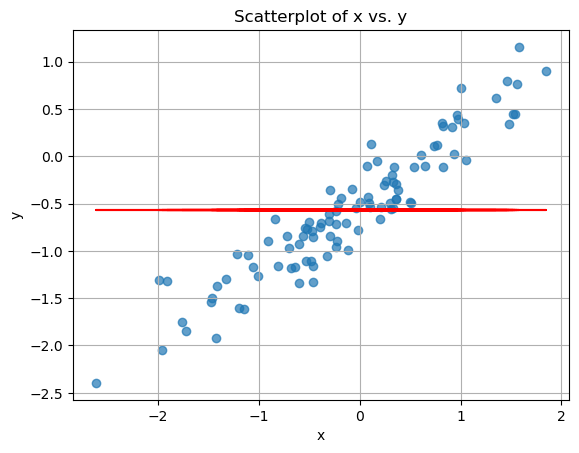

In [240]:
plt.plot(x, y_pred_lasso, color='red', label='Regression Line')
plt.scatter(x, y, alpha=0.7)  
plt.title("Scatterplot of x vs. y")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

plt.show()

In [241]:
r_squared = r2_score(y, y_pred_lasso)
print("R score", r_squared)

R score 0.0


In [242]:
poly_lasso = PolynomialFeatures(degree=2)
x_poly_lasso = poly.fit_transform(x.reshape(-1,1))

# Fit a linear regression model using the polynomial features
poly_model_lasso = Lasso(alpha=alpha) 
poly_model_lasso.fit(x_poly_lasso, y)

# Predict y values using the model
y_pred_lasso_2 = poly_model_lasso.predict(x_poly_lasso)

In [243]:
coefficients_l = poly_model_lasso.coef_
print("coefficients", coefficients_l)

coefficients [ 0.  0. -0.]


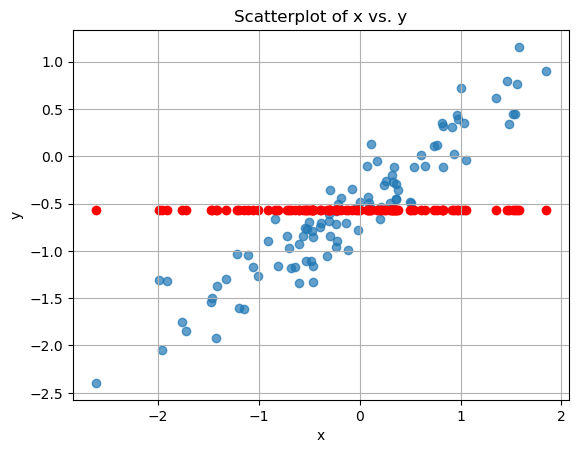

In [244]:
# plt.plot(x, y_pred, color='red', label='Regression Line')
plt.scatter(x, y, alpha=0.7)  
plt.scatter(x, y_pred_lasso_2, color='red', label='Second Regression Line')
plt.title("Scatterplot of x vs. y")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

plt.show()

In [245]:
model_lasso_2 = Lasso(alpha=alpha)
model_lasso_2.fit(x.reshape(-1,1), y2)

Lasso(alpha=1)

In [246]:
slope_lasso_2 = model_lasso_2.coef_[0]
intercept_lasso_2 = model_lasso_2.intercept_
print("slope", slope_lasso_2)
print('intercept', intercept_lasso_2)

slope 0.0
intercept 0.2549975525856507


In [247]:
y_pred_lasso_21 = model_lasso_2.predict(x.reshape(-1,1))

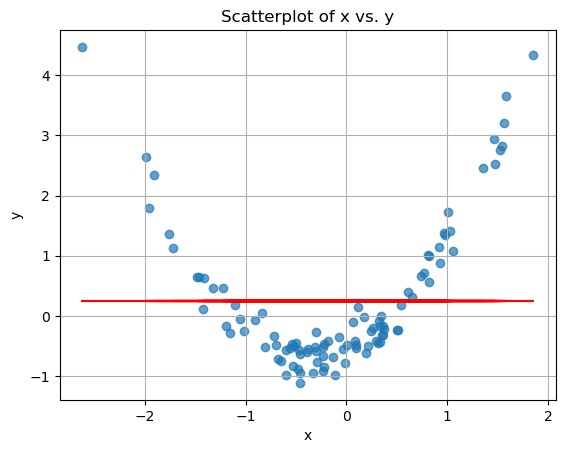

In [248]:
plt.plot(x, y_pred_lasso_21, color='red', label='Regression Line')
plt.scatter(x, y2, alpha=0.7)  
plt.title("Scatterplot of x vs. y")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

plt.show()

In [249]:
r_squared_lasso_21 = r2_score(y2, y_pred_lasso_21)
print("R score", r_squared_lasso_21)

R score 0.0


In [250]:
poly2_lasso = PolynomialFeatures(degree=2)
x_poly2_lasso = poly2_lasso.fit_transform(x.reshape(-1,1))

# Fit a linear regression model using the polynomial features
poly_model2_lasso = Lasso(alpha=alpha)
poly_model2_lasso.fit(x_poly2_lasso, y2)

# Predict y values using the model
y_pred_lasso_22 = poly_model2_lasso.predict(x_poly2_lasso)

In [251]:
coefficients = poly_model2_lasso.coef_
print("coefficients", coefficients)

coefficients [0.         0.         0.12211045]


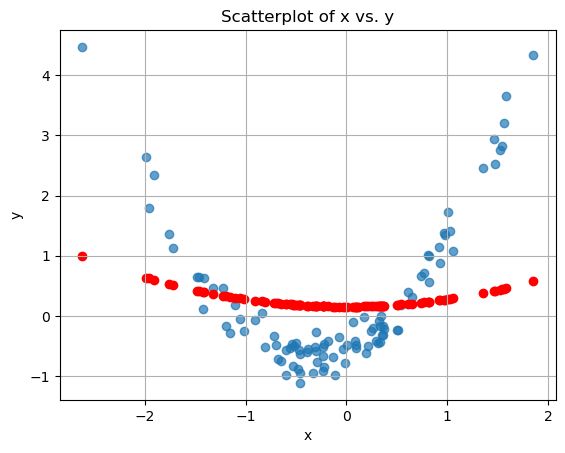

In [252]:
plt.scatter(x, y2, alpha=0.7)  
plt.scatter(x, y_pred_lasso_22, color='red', label='Second Regression Line')
plt.title("Scatterplot of x vs. y")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

plt.show()